In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from factor_analyzer.rotator import Rotator
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = "parameters_phd.csv"  # Path to your uploaded CSV file
data = pd.read_csv(file_path)

# Separate the `ligand` column
ligand_column = data['ligand']
data_numeric = data.drop(columns=['ligand'])
data_numeric = data_numeric.fillna(data_numeric.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Save the transformed data to a new CSV file
pca_df = pd.DataFrame(data_pca, columns=['Component 1', 'Component 2', 'Component 3'])
pca_df['ligand'] = ligand_column.values
# output_file = "/mnt/data/pca_output.csv"
# pca_df.to_csv(output_file, index=False)
#
# print(f"PCA completed. Transformed data saved to {output_file}")
pca_df

,Component 1,Component 2,Component 3,ligand
0,5.903836,0.386168,3.929735,dcPAMP
1,2.891843,-1.872325,3.861452,dcpa
2,1.611508,-4.250493,4.584580,diprpa
3,2.535437,1.956118,-3.224293,DS-10
4,3.930009,1.261301,-3.414409,DS-11
...,...,...,...,...
282,2.411168,2.705329,-2.773335,MS-90
283,-17.261091,7.231310,-0.851907,MS-91
284,3.832145,3.738993,6.433733,MS-92
285,7.553524,1.575750,7.467331,MS-93


np.int64(13)

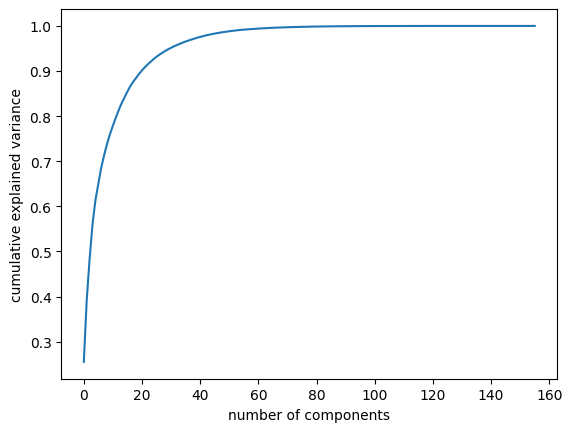

In [29]:
pca_test = PCA().fit(data_scaled)
cumsum_variance = np.cumsum(pca_test.explained_variance_ratio_)
plt.plot(cumsum_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
num_components_geometric = np.argmax(cumsum_variance >= 0.80) + 1
num_components_geometric

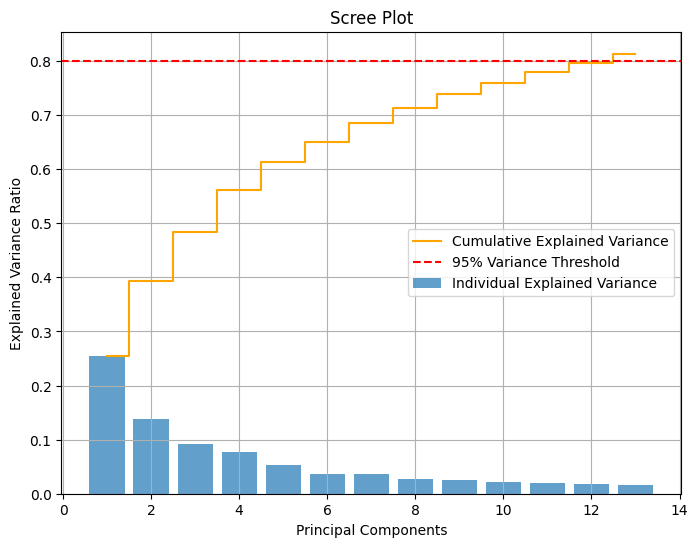

In [6]:
# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance', color='orange')
plt.axhline(y=0.8, color='r', linestyle='--', label='95% Variance Threshold')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()

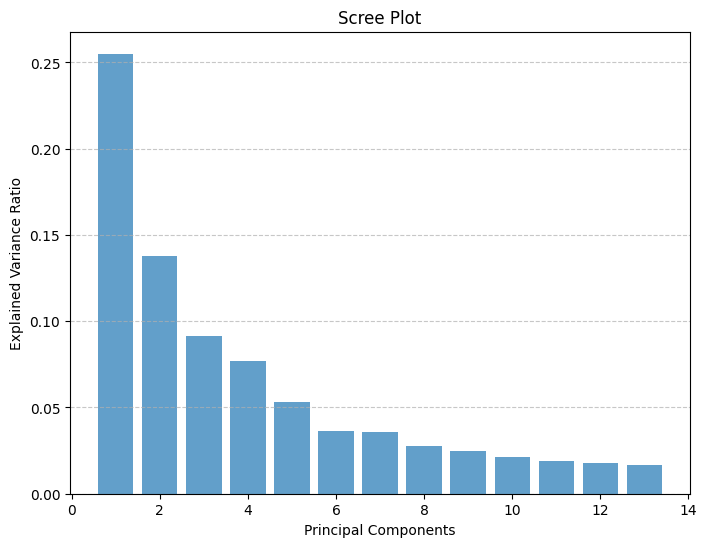

In [7]:
# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a bar plot for the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
feature_names = [col for col in data.columns if col != 'ligand']

loadings_geometric = pd.DataFrame(
    pca_test.components_,
    columns=feature_names,  # Feature names
    index=[f'PC{i+1}' for i in range(len(pca_test.components_))]
)
loadings_geometric

,homo,lumo,dipole,rh_charge,rh_LP_1_occ,rh_LP_1_eng,rh_LP_2_occ,rh_LP_2_eng,rh_LP_3_occ,rh_LP_3_eng,...,Vbur%_5.0,NE_5.0,NW_5.0,SE_5.0,SW_5.0,Vbur%_6.0,NE_6.0,NW_6.0,SE_6.0,SW_6.0
PC1,0.058398,0.062892,-0.026098,0.146803,0.034550,0.072727,0.129457,0.086504,-0.110198,0.075682,...,0.059163,0.050756,0.030594,0.072304,0.032130,0.042453,0.038979,0.023525,0.049705,0.026006
PC2,0.145942,0.115181,-0.037381,0.020716,-0.040949,0.138097,0.009372,0.145360,-0.026066,0.146136,...,0.133841,0.079348,0.103035,0.104443,0.125779,0.158616,0.115944,0.122829,0.135019,0.142662
PC3,-0.049918,-0.048737,0.054759,0.062032,0.000486,-0.056753,0.024668,-0.051473,0.073466,-0.038405,...,0.163690,0.158768,0.132350,0.108958,0.109881,0.133840,0.126276,0.110189,0.094767,0.105571
PC4,-0.075810,-0.131177,0.081357,-0.006587,-0.076043,-0.096759,-0.107913,-0.078263,0.088691,-0.093157,...,-0.009392,0.010280,-0.047605,0.032824,-0.020751,0.010790,0.034842,-0.039849,0.051285,-0.011170
PC5,-0.039884,0.054458,0.012304,0.004814,0.033828,-0.037728,0.000519,-0.011029,-0.001133,-0.015200,...,0.016104,0.015229,-0.015984,-0.005813,0.054249,-0.010677,-0.006062,-0.037727,-0.030689,0.040011
PC6,-0.043697,-0.018888,0.017262,0.004044,-0.067366,-0.037030,-0.027209,-0.031781,-0.073808,-0.010398,...,0.026039,-0.017866,0.190663,0.023242,-0.113039,0.044063,-0.012641,0.174921,0.065136,-0.085212
PC7,0.083271,0.085524,0.002760,-0.023689,-0.017748,0.080609,-0.017213,0.058216,0.025803,0.067870,...,-0.014442,0.147572,0.049456,-0.178523,-0.058154,0.001780,0.140086,0.033082,-0.127092,-0.034776
PC8,0.002944,-0.057438,0.085391,0.047488,0.061080,-0.005449,-0.011443,0.010271,0.006923,-0.002216,...,-0.082294,0.014425,-0.064227,-0.025751,-0.168028,-0.084767,-0.034885,-0.056190,-0.049656,-0.134882
PC9,-0.010531,0.000312,-0.152186,-0.017764,-0.126786,-0.006739,-0.037328,0.075391,0.031850,0.062858,...,0.012531,0.074999,0.000035,0.001175,-0.031314,-0.003028,0.024211,0.002091,-0.025092,-0.010053
PC10,-0.027754,0.001615,0.036525,-0.036917,-0.156845,-0.063512,0.062891,-0.047771,0.203025,-0.077820,...,0.020570,0.016782,0.018312,0.005168,0.022811,-0.020684,-0.037298,-0.006357,-0.037929,0.013984


In [10]:
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings_geometric.values)

# Create a DataFrame for rotated loadings_geometric
rotated_loadings_df = pd.DataFrame(
    rotated_loadings,
    columns=loadings_geometric.columns,
    index=loadings_geometric.index
)
rotated_loadings_df

,homo,lumo,dipole,rh_charge,rh_LP_1_occ,rh_LP_1_eng,rh_LP_2_occ,rh_LP_2_eng,rh_LP_3_occ,rh_LP_3_eng,...,Vbur%_5.0,NE_5.0,NW_5.0,SE_5.0,SW_5.0,Vbur%_6.0,NE_6.0,NW_6.0,SE_6.0,SW_6.0
PC1,1.734723e-16,-5.377643e-17,-2.072995e-16,1.000000e+00,-3.122502e-17,2.775558e-17,3.330669e-16,-4.943962e-17,-6.938894e-18,1.040834e-16,...,-5.118815e-11,1.387779e-17,-2.081668e-17,2.220446e-16,-6.938894e-18,-2.755415e-11,1.734723e-17,-1.040834e-17,4.163336e-17,6.245005e-17
PC2,-8.673617e-17,-5.898060e-17,1.561251e-16,2.755465e-11,-1.682682e-16,1.942890e-16,-2.012279e-16,1.595946e-16,4.857226e-17,-2.802663e-17,...,3.989445e-11,5.030698e-17,-3.816392e-17,0.000000e+00,0.000000e+00,1.000000e+00,-2.428613e-17,-3.409816e-17,-1.214306e-17,-1.040834e-17
PC3,5.551115e-17,1.621966e-16,8.933826e-17,5.118839e-11,-7.285839e-17,-5.117434e-17,1.040834e-17,-1.457168e-16,-6.938894e-17,-4.857226e-17,...,1.000000e+00,-6.765422e-17,-1.843144e-18,4.857226e-17,3.469447e-17,-3.989450e-11,4.857226e-17,-3.035766e-17,6.418477e-17,1.561251e-17
PC4,2.775558e-17,4.119968e-17,-6.938894e-17,6.096165e-11,-3.447763e-17,8.326673e-17,-4.163336e-17,1.457168e-16,1.231654e-16,1.595946e-16,...,-1.979324e-11,6.245005e-17,3.469447e-17,-1.249001e-16,4.857226e-17,4.992942e-11,-7.285839e-17,-2.775558e-17,3.469447e-17,-7.632783e-17
PC5,7.112366e-17,4.293441e-17,7.285839e-17,-3.407223e-11,-6.938894e-18,3.469447e-18,-2.172741e-16,-6.938894e-18,2.081668e-17,1.075529e-16,...,1.549115e-11,-4.163336e-17,5.377643e-17,5.204170e-17,2.081668e-17,1.371829e-10,-9.020562e-17,6.245005e-17,-2.081668e-17,0.000000e+00
PC6,-6.245005e-17,8.196568e-17,-2.081668e-17,3.868479e-10,-1.318390e-16,-1.040834e-16,-1.526557e-16,-5.030698e-17,1.873501e-16,5.204170e-17,...,1.437079e-10,8.500145e-17,-1.561251e-17,-1.144917e-16,8.326673e-17,2.051861e-10,1.387779e-17,-2.775558e-17,6.938894e-18,-2.775558e-17
PC7,3.469447e-17,3.469447e-17,6.938894e-18,5.848515e-10,-1.387779e-16,7.632783e-17,-8.229094e-17,0.000000e+00,-5.551115e-17,-1.942890e-16,...,1.924644e-10,-3.469447e-17,2.775558e-17,-1.734723e-17,0.000000e+00,2.266466e-10,3.534499e-17,-1.283695e-16,-3.946496e-17,2.428613e-17
PC8,3.382711e-17,-4.163336e-17,-4.163336e-17,1.518461e-11,-1.387779e-17,9.020562e-17,1.734723e-17,5.204170e-17,3.122502e-17,-2.775558e-17,...,-1.133888e-10,3.122502e-17,-2.428613e-17,1.387779e-17,-6.938894e-18,-2.688921e-10,7.632783e-17,-5.551115e-17,6.938894e-18,2.255141e-17
PC9,-2.775558e-17,-2.671474e-16,-8.847090e-17,-3.931505e-10,1.318390e-16,-1.387779e-16,-2.775558e-17,1.387779e-17,-5.551115e-17,-4.163336e-17,...,-1.354650e-10,-1.110223e-16,-5.551115e-17,-4.163336e-17,5.898060e-17,8.159732e-11,-4.163336e-17,4.163336e-17,3.469447e-17,-5.421011e-18
PC10,-1.387779e-17,-4.683753e-17,3.989864e-17,-4.698898e-11,1.040834e-16,-1.457168e-16,-7.285839e-17,-1.249001e-16,-2.532696e-16,-1.726050e-16,...,-1.228237e-10,-1.249001e-16,-7.979728e-17,9.194034e-17,-2.775558e-17,1.310029e-10,6.245005e-17,3.122502e-17,5.204170e-17,5.551115e-17


In [11]:
# Extract the most relevant features for each factor
top_n = 5  # Number of top features to select per factor
most_relevant_features = {}

for factor in rotated_loadings_df.index:
    # Get top N features by absolute loading
    top_features = rotated_loadings_df.loc[factor].abs().nlargest(top_n).index.tolist()
    most_relevant_features[factor] = top_features

# Display results
for factor, features in most_relevant_features.items():
    print(f"{factor}: {features}")

PC1: ['rh_charge', 'p2_c4_dist', 'NE_2.0', 'NW_3.0', 'p2_r4_antibond_eng']
PC2: ['Vbur%_6.0', 'p2_bridge_bond_occ_no_rh', 'p2_c4_dist', 'NW_3.0', 'c2_nbo']
PC3: ['Vbur%_5.0', 'p2_r4_antibond_eng', 'p2_c4_dist', 'c2_nbo', 'NW_3.0']
PC4: ['lumo_no_rh', 'p2_bridge_bond_occ_no_rh', 'NW_3.0', 'p2_c4_dist', 'r1_p1_rh_angle']
PC5: ['p2_bridge_dist', 'Vbur%_6.0', 'lumo_no_rh', 'p2_bridge_bond_occ_no_rh', 'p2_c4_dist']
PC6: ['NW_3.0', 'rh_charge', 'c2_nbo', 'Vbur%_6.0', 'Vbur%_5.0']
PC7: ['p2_c4_dist', 'rh_charge', 'Vbur%_6.0', 'Vbur%_5.0', 'c2_nbo']
PC8: ['p2_bridge_bond_occ_no_rh', 'NE_2.0', 'Vbur%_6.0', 'lumo_no_rh', 'Vbur%_5.0']
PC9: ['NE_2.0', 'rh_charge', 'p2_bridge_bond_occ_no_rh', 'Vbur%_5.0', 'NW_3.0']
PC10: ['Vbur%_2.0', 'Vbur%_6.0', 'Vbur%_5.0', 'p2_bridge_bond_occ_no_rh', 'lumo_no_rh']
PC11: ['c2_nbo', 'NW_3.0', 'Vbur%_6.0', 'Vbur%_5.0', 'p2_r4_antibond_eng']
PC12: ['r1_p1_rh_angle', 'NW_3.0', 'Vbur%_5.0', 'lumo_no_rh', 'NE_2.0']
PC13: ['p2_r4_antibond_eng', 'Vbur%_5.0', 'rh_charge'

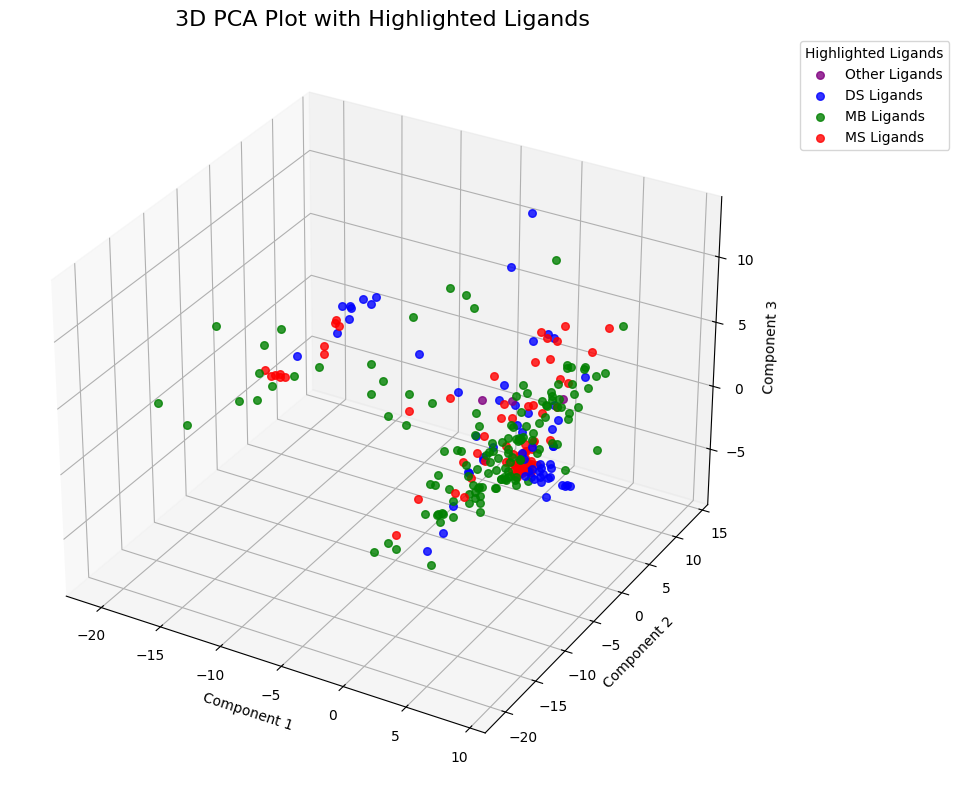

In [12]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}
labels_added = {key: False for key in categories}

for ligand in pca_df['ligand'].unique():
    subset = pca_df[pca_df['ligand'] == ligand]
    if "DS" in ligand:
        category = "DS"
    elif "MS" in ligand:
        category = "MS"
    elif "MB" in ligand:
        category = "MB"
    else:
        category = "Other"

    ax.scatter(
        subset['Component 1'],
        subset['Component 2'],
        subset['Component 3'],
        color=categories[category]["color"],
        s=30,
        alpha=0.8,
        label=categories[category]["label"] if not labels_added[category] else None
    )
    labels_added[category] = True

ax.set_title('3D PCA Plot with Highlighted Ligands', fontsize=16)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Highlighted Ligands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Initialize a Plotly figure
fig = go.Figure()

# Add scatter traces for each category
for category, properties in categories.items():
    subset = pca_df[
        pca_df['ligand'].str.contains(category) if category != "Other" else ~pca_df['ligand'].str.contains("DS|MS|MB")
    ]
    fig.add_trace(
        go.Scatter3d(
            x=subset['Component 1'],
            y=subset['Component 2'],
            z=subset['Component 3'],
            mode='markers',
            marker=dict(size=5, color=properties["color"]),
            name=properties["label"],  # Legend label
            text=subset['ligand'],  # Hover text
            hoverinfo="text"  # Display only hover text
        )
    )

# Customize layout
fig.update_layout(
    title='3D PCA Plot with Highlighted Ligands',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    legend=dict(title="Ligand Categories")
)

# Show plot
fig.show()

In [16]:
import plotly.express as px

# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Assign a category to each ligand for color coding
def get_category(ligand):
    if "DS" in ligand:
        return "DS Ligands"
    elif "MS" in ligand:
        return "MS Ligands"
    elif "MB" in ligand:
        return "MB Ligands"
    else:
        return "Other Ligands"

pca_df['category'] = pca_df['ligand'].apply(get_category)

# Define a function to plot 2D slices
def plot_2d_slice(x, y, x_label, y_label):
    fig = px.scatter(
        pca_df,
        x=x,
        y=y,
        color='category',
        color_discrete_map={
            "DS Ligands": "blue",
            "MS Ligands": "red",
            "MB Ligands": "green",
            "Other Ligands": "purple",
        },
        hover_data={'ligand': True},  # Show ligand names on hover
        title=f'2D PCA Slice: {x_label} vs {y_label}',
        labels={'category': 'Ligand Category'}
    )
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Ligand Categories"
    )
    return fig

# Generate and display 2D slices
fig1 = plot_2d_slice('Component 1', 'Component 2', 'Component 1', 'Component 2')
fig2 = plot_2d_slice('Component 1', 'Component 3', 'Component 1', 'Component 3')
fig3 = plot_2d_slice('Component 2', 'Component 3', 'Component 2', 'Component 3')

# Show the figures
fig1.show()
fig2.show()
fig3.show()

In [17]:
geometric = [
	"bite_angle",
	"c1_rh_dist",
	"c2_rh_dist",
	"c3_rh_dist",
	"c4_rh_dist",
	"p1_c1_dist",
	"p1_c2_dist",
	"p2_c3_dist",
	"p2_c4_dist",
	"p1_bridge_dist",
	"p2_bridge_dist",
	"p1_angle_sum",
	"p2_angle_sum",
	"rh_p1_bridge_angle",
	"rh_p2_bridge_angle",
	"r1_p1_rh_angle",
	"r2_p1_rh_angle",
	"r3_p2_rh_angle",
	"r4_p2_rh_angle",
	"r1_p1_bridge_angle",
	"r2_p1_bridge_angle",
	"r3_p2_bridge_angle",
	"r4_p2_bridge_angle"
]

steric = [
	"Vbur%_1.0",
	"NE_1.0",
	"NW_1.0",
	"SE_1.0",
	"SW_1.0",
	"Vbur%_2.0",
	"NE_2.0",
	"NW_2.0",
	"SE_2.0",
	"SW_2.0",
	"Vbur%_3.0",
	"NE_3.0",
	"NW_3.0",
	"SE_3.0",
	"SW_3.0",
	"Vbur%_4.0",
	"NE_4.0",
	"NW_4.0",
	"SE_4.0",
	"SW_4.0",
	"Vbur%_5.0",
	"NE_5.0",
	"NW_5.0",
	"SE_5.0",
	"SW_5.0",
	"Vbur%_6.0",
	"NE_6.0",
	"NW_6.0",
	"SE_6.0",
	"SW_6.0"
]

electronic = [
	"homo",
	"lumo",
	"dipole",
	"rh_charge",
	"rh_LP_1_occ",
	"rh_LP_1_eng",
	"rh_LP_2_occ",
	"rh_LP_2_eng",
	"rh_LP_3_occ",
	"rh_LP_3_eng",
	"rh_LP_4_occ",
	"rh_LP_4_eng",
	"homo_no_rh",
	"lumo_no_rh",
	"dipole_no_rh",
	"r1_nbo",
	"r2_nbo",
	"r3_nbo",
	"r4_nbo",
	"bridge_nbo",
	"p1_nbo",
	"p2_nbo",
	"c1_nbo",
	"c2_nbo",
	"c3_nbo",
	"c4_nbo",
	"p1_nmr",
	"p1_nmr_aniso",
	"p2_nmr",
	"p2_nmr_aniso",
	"p1_rh_bond_occ",
	"p2_rh_bond_occ",
	"p1_rh_bond_eng",
	"p2_rh_bond_eng",
	"p1_rh_antibond_occ",
	"p2_rh_antibond_occ",
	"p1_rh_antibond_eng",
	"p2_rh_antibond_eng",
	"p1_r1_bond_occ",
	"p1_r2_bond_occ",
	"p2_r3_bond_occ",
	"p2_r4_bond_occ",
	"p1_r1_bond_eng",
	"p1_r2_bond_eng",
	"p2_r3_bond_eng",
	"p2_r4_bond_eng",
	"p1_r1_antibond_occ",
	"p1_r2_antibond_occ",
	"p2_r3_antibond_occ",
	"p2_r4_antibond_occ",
	"p1_r1_antibond_eng",
	"p1_r2_antibond_eng",
	"p2_r3_antibond_eng",
	"p2_r4_antibond_eng",
	"p1_bridge_bond_occ",
	"p2_bridge_bond_occ",
	"p1_bridge_bond_eng",
	"p2_bridge_bond_eng",
	"p1_bridge_antibond_occ",
	"p2_bridge_antibond_occ",
	"p1_bridge_antibond_eng",
	"p2_bridge_antibond_eng",
	"p1_nbo_no_rh",
	"p2_nbo_no_rh",
	"r1_nbo_no_rh",
	"r2_nbo_no_rh",
	"r3_nbo_no_rh",
	"r4_nbo_no_rh",
	"bridge_nbo_no_rh",
	"p1_nmr_no_rh",
	"p1_nmr_aniso_no_rh",
	"p2_nmr_no_rh",
	"p2_nmr_aniso_no_rh",
	"p1_LP_occ_no_rh",
	"p1_LP_eng_no_rh",
	"p2_LP_occ_no_rh",
	"p2_LP_eng_no_rh",
	"p1_r1_bond_occ_no_rh",
	"p1_r2_bond_occ_no_rh",
	"p2_r3_bond_occ_no_rh",
	"p2_r4_bond_occ_no_rh",
	"p1_r1_bond_eng_no_rh",
	"p1_r2_bond_eng_no_rh",
	"p2_r3_bond_eng_no_rh",
	"p2_r4_bond_eng_no_rh",
	"p1_r1_antibond_occ_no_rh",
	"p1_r2_antibond_occ_no_rh",
	"p2_r3_antibond_occ_no_rh",
	"p2_r4_antibond_occ_no_rh",
	"p1_r1_antibond_eng_no_rh",
	"p1_r2_antibond_eng_no_rh",
	"p2_r3_antibond_eng_no_rh",
	"p2_r4_antibond_eng_no_rh",
	"p1_bridge_bond_occ_no_rh",
	"p2_bridge_bond_occ_no_rh",
	"p1_bridge_bond_eng_no_rh",
	"p2_bridge_bond_eng_no_rh",
	"p1_bridge_antibond_occ_no_rh",
	"p2_bridge_antibond_occ_no_rh",
	"p1_bridge_antibond_eng_no_rh",
	"p2_bridge_antibond_eng_no_rh",
	"p1_LP_s_occ_no_rh",
	"p2_LP_s_occ_no_rh"
]

In [44]:
data_scaled_name = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Create PCAs for each group of parameters. They will have as many components as parameters has the group
pca_geometric = PCA().fit(data_scaled_name[geometric])
pca_electronic = PCA().fit(data_scaled_name[electronic])
pca_steric = PCA().fit(data_scaled_name[steric])

# Get the number of PC that explain >= 80 % of the variance for each PCA and recalculate PCA with the obtained value
cumsum_variance_geometric = np.cumsum(pca_geometric.explained_variance_ratio_)
num_components_geometric = np.argmax(cumsum_variance_geometric >= 0.80) + 1
pca_geometric = PCA(n_components=num_components_geometric).fit(data_scaled_name[geometric])

cumsum_variance_electronic = np.cumsum(pca_electronic.explained_variance_ratio_)
num_components_electronic = np.argmax(cumsum_variance_electronic >= 0.80) + 1
pca_electronic = PCA(n_components=num_components_electronic).fit(data_scaled_name[electronic])

cumsum_variance_steric = np.cumsum(pca_steric.explained_variance_ratio_)
num_components_steric = np.argmax(cumsum_variance_steric >= 0.80) + 1
pca_steric = PCA(n_components=num_components_steric).fit(data_scaled_name[steric])

# Get the loadings for each PCA
loadings_geometric = pd.DataFrame(
    pca_geometric.components_,
    columns=geometric,
    index=[f'PC{i+1}' for i in range(num_components_geometric)]
)
loadings_electronic = pd.DataFrame(
    pca_electronic.components_,
    columns=electronic,
    index=[f'PC{i+1}' for i in range(num_components_electronic)]
)
loadings_steric = pd.DataFrame(
    pca_steric.components_,
    columns=steric,
    index=[f'PC{i+1}' for i in range(num_components_steric)]
)

# Perform varimax rotation for each of the loadings
rotated_geometric = Rotator(method='varimax').fit_transform(loadings_geometric.values)
rotated_electronic = Rotator(method='varimax').fit_transform(loadings_electronic.values)
rotated_steric = Rotator(method='varimax').fit_transform(loadings_steric.values)

varimax_geometric = pd.DataFrame(
    rotated_geometric,
    columns=loadings_geometric.columns,
    index=loadings_geometric.index
)
varimax_electronic = pd.DataFrame(
    rotated_electronic,
    columns=loadings_electronic.columns,
    index=loadings_electronic.index
)
varimax_steric = pd.DataFrame(
    rotated_steric,
    columns=loadings_steric.columns,
    index=loadings_steric.index
)

# Extract the most relevant features for each factor
top_features_geometric = {}
top_features_electronic = {}
top_features_steric = {}

for factor in varimax_geometric.index:
    top_features = varimax_geometric.loc[factor].abs().nlargest(5).index.tolist()
    top_features_geometric[factor] = top_features

for factor in varimax_electronic.index:
    top_features = varimax_electronic.loc[factor].abs().nlargest(5).index.tolist()
    top_features_electronic[factor] = top_features

for factor in varimax_steric.index:
    top_features = varimax_steric.loc[factor].abs().nlargest(5).index.tolist()
    top_features_steric[factor] = top_features

print("---- GEOMETRIC TOP FEATURES ----")
for factor, features in top_features_geometric.items():
    print(f"{factor}: {features}")
print("\n---- ELECTRONIC TOP FEATURES ----")
for factor, features in top_features_electronic.items():
    print(f"{factor}: {features}")
print("\n---- STERIC TOP FEATURES ----")
for factor, features in top_features_steric.items():
    print(f"{factor}: {features}")

---- GEOMETRIC TOP FEATURES ----
PC1: ['bite_angle', 'r4_p2_rh_angle', 'r2_p1_rh_angle', 'p2_angle_sum', 'p2_c3_dist']
PC2: ['r3_p2_bridge_angle', 'r4_p2_rh_angle', 'p2_angle_sum', 'r2_p1_rh_angle', 'r4_p2_bridge_angle']
PC3: ['p2_c3_dist', 'p2_angle_sum', 'r4_p2_rh_angle', 'r3_p2_bridge_angle', 'bite_angle']
PC4: ['p2_angle_sum', 'r4_p2_rh_angle', 'p2_c3_dist', 'r2_p1_rh_angle', 'r3_p2_bridge_angle']
PC5: ['p1_angle_sum', 'r2_p1_rh_angle', 'r4_p2_bridge_angle', 'r4_p2_rh_angle', 'bite_angle']
PC6: ['r4_p2_bridge_angle', 'r4_p2_rh_angle', 'r3_p2_bridge_angle', 'p1_angle_sum', 'p2_angle_sum']
PC7: ['r4_p2_rh_angle', 'r2_p1_rh_angle', 'p2_angle_sum', 'r3_p2_bridge_angle', 'p2_c3_dist']
PC8: ['r2_p1_rh_angle', 'r4_p2_rh_angle', 'p1_angle_sum', 'p2_angle_sum', 'bite_angle']

---- ELECTRONIC TOP FEATURES ----
PC1: ['p1_r2_bond_eng_no_rh', 'p2_bridge_antibond_eng', 'p2_rh_bond_occ', 'lumo_no_rh', 'c4_nbo']
PC2: ['rh_LP_4_eng', 'rh_LP_4_occ', 'c4_nbo', 'p2_rh_bond_occ', 'p2_bridge_antibond_en

In [60]:
pca_geometric_trans = pca_geometric.transform(data_scaled_name[geometric])
pca_electronic_trans = pca_electronic.transform(data_scaled_name[electronic])
pca_steric_trans = pca_steric.transform(data_scaled_name[steric])

print(pca_geometric.explained_variance_ratio_)
print(pca_electronic.explained_variance_ratio_)
print(pca_steric.explained_variance_ratio_)

[0.22179451 0.1183544  0.10153389 0.09026613 0.08929431 0.07292511
 0.06654644 0.05116355]
[0.32240632 0.16770123 0.09965413 0.06555793 0.05838852 0.03025218
 0.02520726 0.02348907 0.02120427]
[0.42818836 0.130849   0.10201145 0.08830636 0.07453808]


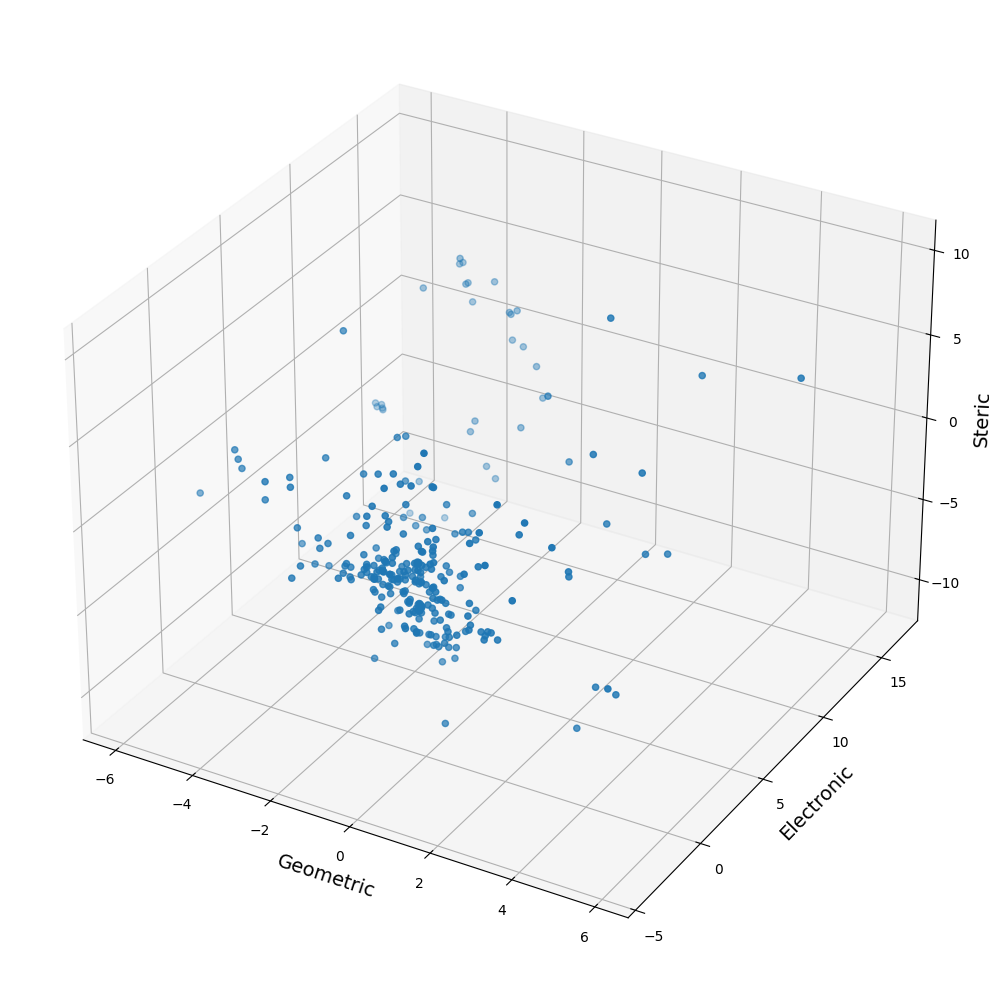

In [81]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_geometric_trans[:,0], pca_electronic_trans[:,0], pca_steric_trans[:,0])

ax.set_xlim3d(min(pca_geometric_trans[:,0]), max(pca_geometric_trans[:,0]))
ax.set_ylim3d(min(pca_electronic_trans[:,0]), max(pca_electronic_trans[:,0]))
ax.set_zlim3d(min(pca_steric_trans[:,0]), max(pca_steric_trans[:,0]))

ax.set_xlabel('Geometric', fontsize=14)
ax.set_ylabel('Electronic', fontsize=14)
ax.set_zlabel('Steric', fontsize=14)

plt.tight_layout()
plt.show()

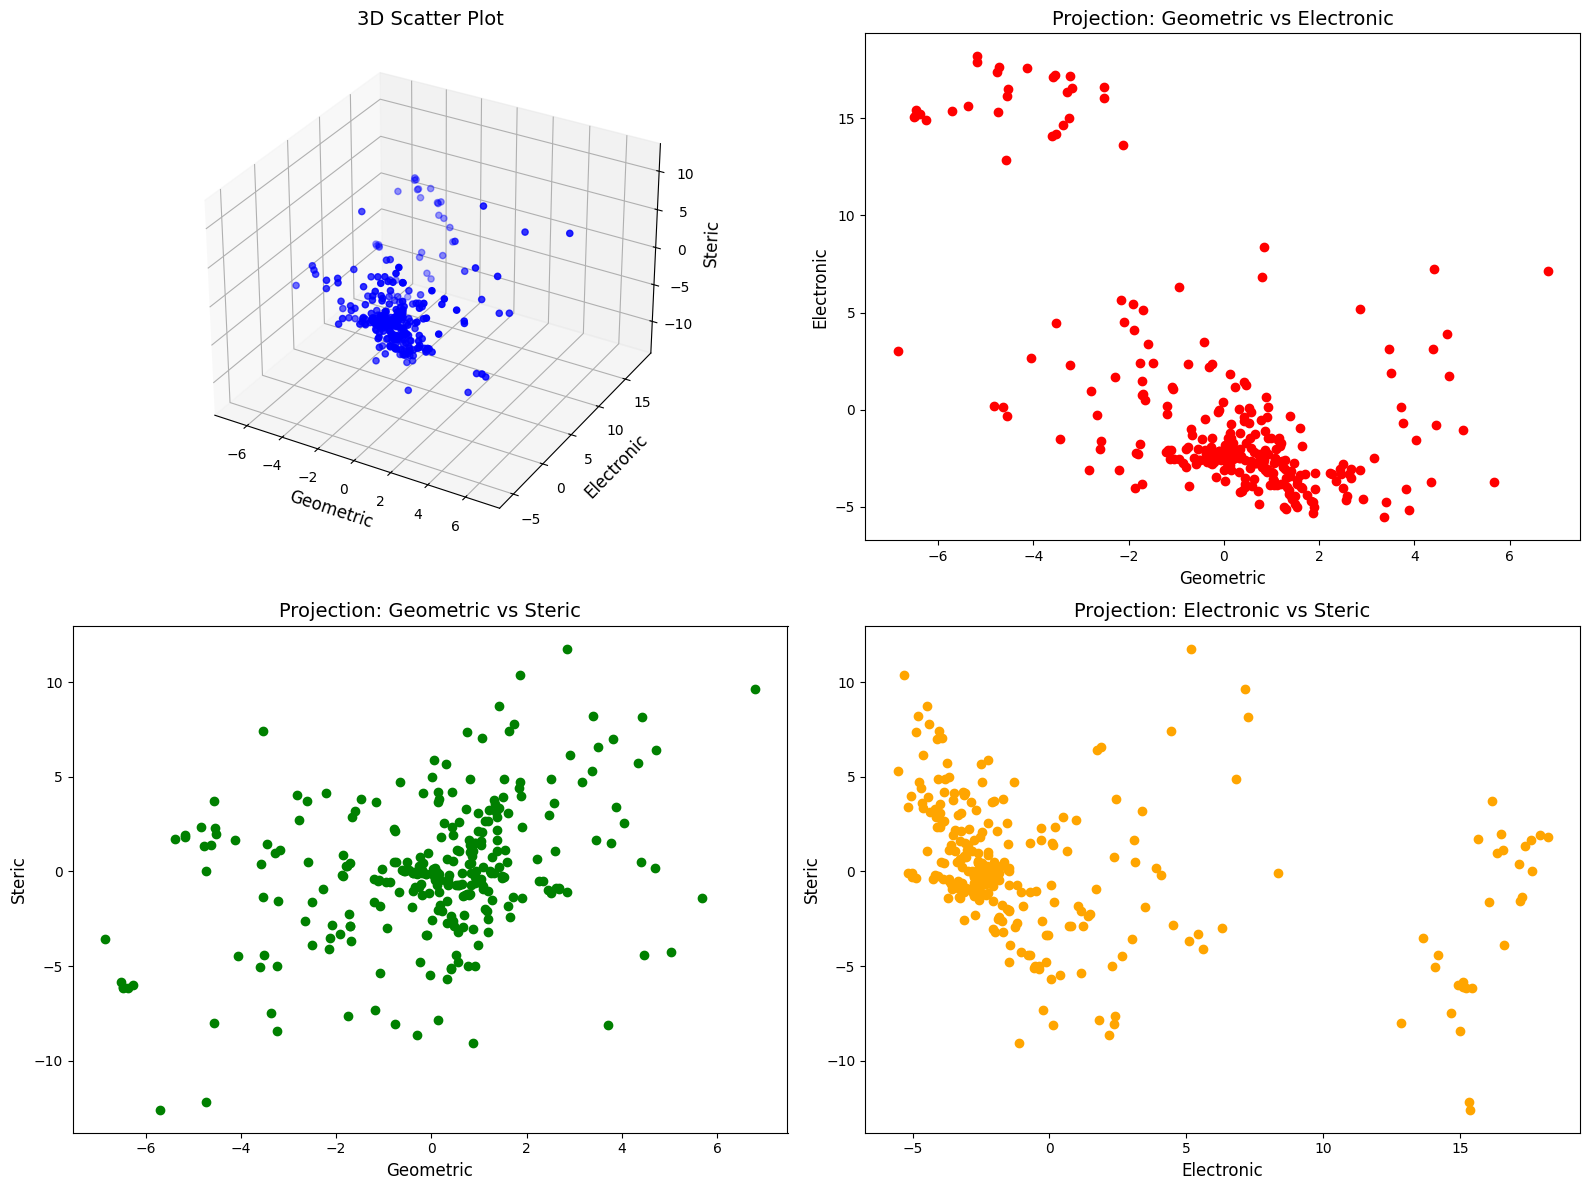

In [80]:
fig = plt.figure(figsize=(16, 12))

# 3D plot
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(
    pca_geometric_trans[:, 0],
    pca_electronic_trans[:, 0],
    pca_steric_trans[:, 0],
    c='b'
)
ax1.set_xlabel('Geometric', fontsize=12)
ax1.set_ylabel('Electronic', fontsize=12)
ax1.set_zlabel('Steric', fontsize=12)
ax1.set_title('3D Scatter Plot', fontsize=14)

# XY plane projection
ax2 = fig.add_subplot(222)
ax2.scatter(
    pca_geometric_trans[:, 0],
    pca_electronic_trans[:, 0],
    c='r'
)
ax2.set_xlabel('Geometric', fontsize=12)
ax2.set_ylabel('Electronic', fontsize=12)
ax2.set_title('Projection: Geometric vs Electronic', fontsize=14)

# XZ plane projection
ax3 = fig.add_subplot(223)
ax3.scatter(
    pca_geometric_trans[:, 0],
    pca_steric_trans[:, 0],
    c='g'
)
ax3.set_xlabel('Geometric', fontsize=12)
ax3.set_ylabel('Steric', fontsize=12)
ax3.set_title('Projection: Geometric vs Steric', fontsize=14)

# YZ plane projection
ax4 = fig.add_subplot(224)
ax4.scatter(
    pca_electronic_trans[:, 0],
    pca_steric_trans[:, 0],
    c='orange'
)
ax4.set_xlabel('Electronic', fontsize=12)
ax4.set_ylabel('Steric', fontsize=12)
ax4.set_title('Projection: Electronic vs Steric', fontsize=14)

plt.tight_layout()
plt.show()
